## Download dataset

download dataset (coco_val2017) file and unzip to ./data/coco/

In [ ]:
! sh download_coco_val2017.sh

sh: util/download_coco_val2017.sh: No such file or directory


## Run data_loader

In [1]:
from data_loader import data_loader

pycocotools has existed, import successfully


In [2]:
# around 1 min
images, captions = data_loader()

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


In [6]:
images.size(), len(captions)

(torch.Size([5000, 3, 224, 224]), 5000)

A woman stands in the dining area at the table.


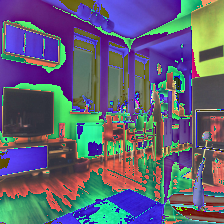

In [8]:
from torchvision import transforms as T

img, cap = images[0], captions[0]
print(cap)
T.ToPILImage()(img)

In [ ]:
from torchvision.datasets import CocoCaptions

data_root = 'data'
dataType = 'val2017'
image_dir = f'{data_root}/coco/val2017/'
ann_file = f'{data_root}/coco/ann_trainval2017/captions_{dataType}.json'

# Construct Dataset
IMG_W = IMG_H = 224
transform = T.Compose([T.Resize((size=224))])

print('-'*40)
coco_val2017 = CocoCaptions(root = image_dir,
                            annFile = ann_file,
                            transform = transform)
print('-'*40)
img_tensor, cap = coco_val2017[0]